In [92]:
# Importando a biblioteca pandas

import pandas as pd

In [93]:
# Importando a base para ánalise

base_instagram = pd.read_excel('instagram_base.xlsx')

In [94]:
#Vizualizando as 5 primeiras linhas da base

base_instagram.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,"82,878.00",Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


In [95]:
# Removendo a coluna vizualizações pos ela não será interresante para o projeto

base_instagram = base_instagram.drop('Visualizações', axis=1)

base_instagram.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [96]:
# Vizualizando as informações da base

base_instagram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


In [97]:
# Verificando os valores do carrossel

base_instagram.Carrossel.value_counts()

Carrossel
S    8
Name: count, dtype: int64

In [98]:
# Substituindo os valores nulo por "N" após a ánalise foi possivel ver que so marcam oque teve carrosel consequentemente os valores nulo significa não
base_instagram.loc[base_instagram.Carrossel.isnull(), "Carrossel"] = "N"

 
base_instagram.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


In [99]:
# Vendo os valores de forma macro

base_instagram.describe()

,Data,Curtidas,Comentários,Interacoes
count,52,52.00,52.00,52.00
mean,2021-12-23 04:36:55.384615424,"12,262.73",189.50,"12,452.23"
min,2021-09-11 00:00:00,"2,807.00",9.00,"2,816.00"
25%,2021-10-23 06:00:00,"5,492.00",69.50,"5,562.50"
50%,2022-01-05 00:00:00,"9,603.00",128.00,"9,773.50"
75%,2022-02-15 12:00:00,"17,621.75",265.25,"17,920.75"
max,2022-03-27 00:00:00,"37,351.00",852.00,"37,853.00"
std,NaN,"8,165.88",170.69,"8,299.39"


<Axes: xlabel='Data', ylabel='Curtidas'>

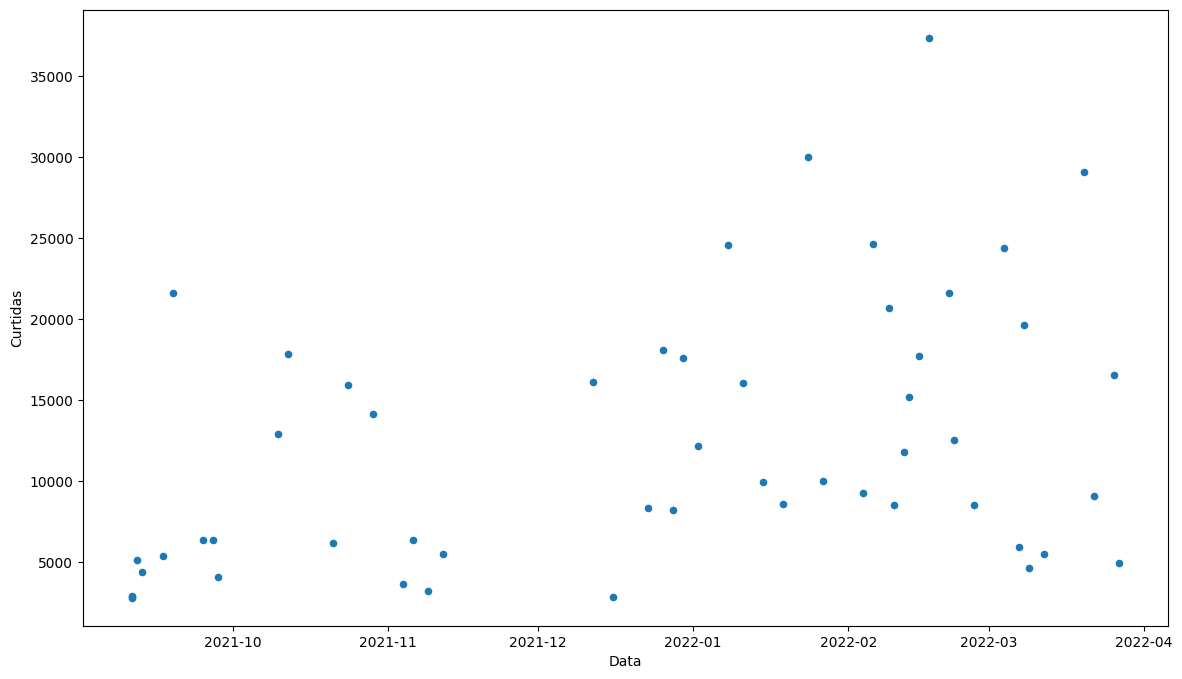

In [100]:
# Verificando se os números de curtidas tem relação com datas

base_instagram.plot(kind = 'scatter', x = 'Data', y = 'Curtidas', figsize = (14,8))

<Axes: xlabel='Data', ylabel='Comentários'>

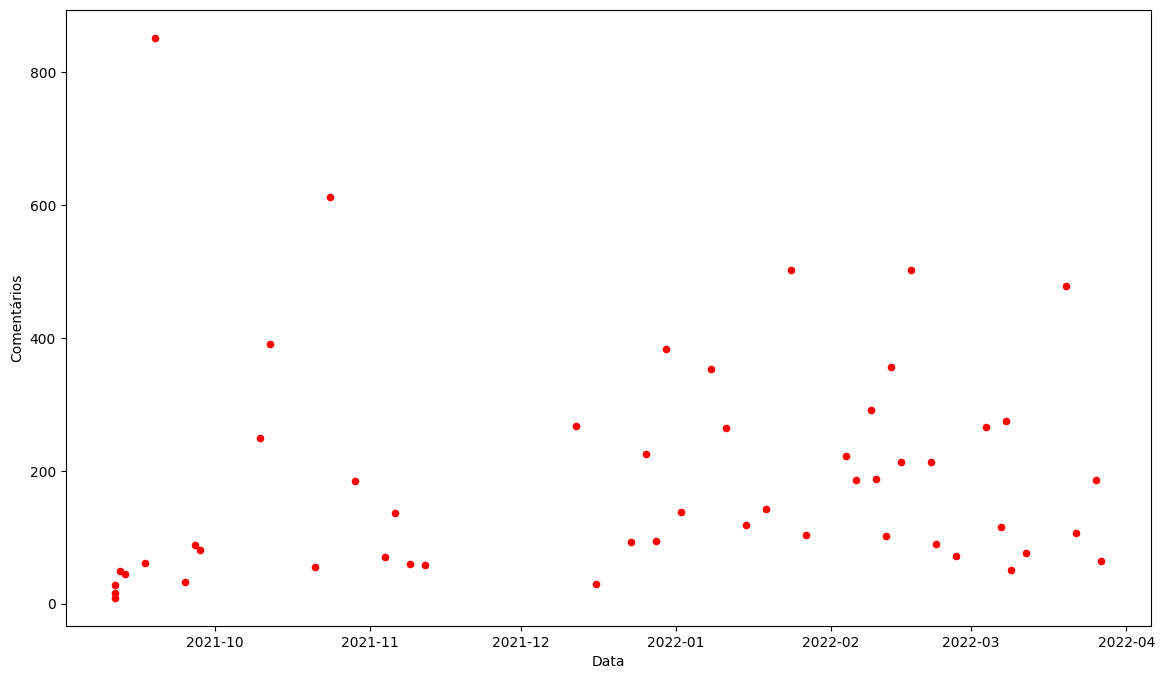

In [101]:
# Verificando se os números de comentarios tem relação com datas
base_instagram.plot(kind = 'scatter', x = 'Data', y = 'Comentários', color = 'red', figsize = (14,8))

In [102]:
# Analisando o top 5 de Curtidas para criar relações

base_instagram.sort_values(by= 'Curtidas', ascending= False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [103]:
# Analisando o top 5 últimos de curtidas para criar relações

base_instagram.sort_values(by= 'Curtidas', ascending=False).tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


In [104]:
# Mudando o formato númerico do pandas

pd.options.display.float_format = '{:,.2f}'.format

In [105]:
# Analisando as curtidas por tipo

base_instagram.groupby("Tipo")["Curtidas"].mean()

Tipo
Foto    13,341.14
IGTV     6,833.40
Reels   14,873.00
Vídeo    8,141.50
Name: Curtidas, dtype: float64

In [106]:
# Analisando as curtidas quando tem ou não pessoas na postagem

base_instagram.groupby("Pessoas")["Curtidas"].mean()

Pessoas
N    4,256.67
S   14,664.55
Name: Curtidas, dtype: float64

In [107]:
# Analisando as curtidas por tipo e pessoas

base_instagram.groupby(["Tipo","Pessoas"])["Curtidas"].mean()

Tipo   Pessoas
Foto   N          3,863.50
       S         15,236.67
IGTV   S          6,833.40
Reels  N          5,934.50
       S         20,832.00
Vídeo  N          4,007.50
       S         16,409.50
Name: Curtidas, dtype: float64

In [108]:
# Analisando Comentarios e curtidas por tipo e Pessoas

base_instagram.groupby(["Tipo","Pessoas"])[["Curtidas", "Comentários"]].mean()

Curtidas  Comentários
Tipo  Pessoas                       
Foto  N        3,863.50        29.50
      S       15,236.67       226.20
IGTV  S        6,833.40       133.60
Reels N        5,934.50        98.00
      S       20,832.00       342.00
Vídeo N        4,007.50        65.25
      S       16,409.50       370.00

In [109]:
# Analisando Comentarios e curtidas por Tipo, Pessoas e Campanhas
base_instagram.groupby(["Tipo","Pessoas", "Campanhas"])[["Curtidas", "Comentários"]].mean()

Curtidas  Comentários
Tipo  Pessoas Campanhas                       
Foto  N       N          2,869.00        20.50
              S          5,852.50        47.50
      S       N         10,815.29       159.93
              S         19,105.38       284.19
IGTV  S       N          6,833.40       133.60
Reels N       N          5,934.50        98.00
      S       N         12,894.00       249.00
              S         24,801.00       388.50
Vídeo N       N          4,007.50        65.25
      S       S         16,409.50       370.00

In [110]:
# Analisando Curtidas e Comentarios quando tem pessoas na postagem

base_instagram.groupby("Pessoas")[["Curtidas", "Comentários"]].mean()

,Curtidas,Comentários
Pessoas,,
N,"4,256.67",52.83
S,"14,664.55",230.50


In [111]:
# Analisando Curtidas e Comentarios quando tem Campanha ou não

base_instagram.groupby("Campanhas")[["Curtidas", "Comentários"]].mean()

,Curtidas,Comentários
Campanhas,,
N,"7,928.33",123.17
S,"18,173.27",279.95


In [112]:
# Analisando Curtidas e Comentarios quando e foto em Carrossel
base_instagram[base_instagram.Tipo == "Foto"].groupby(["Carrossel"])[["Curtidas", "Comentários"]].mean()

,Curtidas,Comentários
Carrossel,,
N,"13,776.36",208.57
S,"11,817.88",140.38


In [113]:
base_instagram.groupby(["Pessoas", "Campanhas"])[["Curtidas", "Comentários"]].mean()

Curtidas  Comentários
Pessoas Campanhas                       
N       N          3,937.50        53.90
        S          5,852.50        47.50
S       N          9,923.75       157.80
        S         19,405.35       303.20

In [114]:
base_instagram.groupby(["Pessoas", "Campanhas", "Tipo"])[["Curtidas", "Comentários"]].mean()

Curtidas  Comentários
Pessoas Campanhas Tipo                        
N       N         Foto   2,869.00        20.50
                  Reels  5,934.50        98.00
                  Vídeo  4,007.50        65.25
        S         Foto   5,852.50        47.50
S       N         Foto  10,815.29       159.93
                  IGTV   6,833.40       133.60
                  Reels 12,894.00       249.00
        S         Foto  19,105.38       284.19
                  Reels 24,801.00       388.50
                  Vídeo 16,409.50       370.00

In [115]:
base_instagram[base_instagram.Tipo == "Vídeo"]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576
